In [1]:
# Base library imports
import os
import re

# Module imports
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Quick pathfix required before loading project resources
try:
    notebook_location
except NameError:
    notebook_location = os.getcwd()
    os.chdir(re.sub(r'(adversarial-filters)[\\/].*', r'\1', notebook_location))

# Project imports
from filter import ColorBlindnessFilter
from filter import DaltonizationFilter
from filter import DaltonizationLabEnchanceFilter
from filter import FourierEllipsoidFilter
from filter import FourierGaussianFilter
from filter import FourierUniformFilter
from filter import GaussianFilter
from filter import GaussianNoiseFilter
from filter import HistogramEqualizationFilter
from filter import SaltPepperNoiseFilter
from filter import SpeckleNoiseFilter
from filter import WaveletDenoiseFilter

Using TensorFlow backend.


In [2]:
def visualize_image(images, index, filter, dimensions, model, preprocessor, decoder):
    original_image = images[index][0].copy()
    transformed_image = filter.transform_image(dimensions, original_image.copy())
    original_input = preprocessor(np.expand_dims(original_image.copy(), axis=0))
    transformed_input = preprocessor(np.expand_dims(transformed_image.copy(), axis=0))
    original_predictions = model.predict(original_input)
    transformed_predictions = model.predict(transformed_input)

    decoded_original = decoder(original_predictions, top=1000)
    decoded_transformed = decoder(transformed_predictions, top=1000)

    original_class = decoded_original[0][0][1]
    original_score = decoded_original[0][0][2]

    transformed_class = decoded_transformed[0][0][1]
    transformed_score = decoded_transformed[0][0][2]

    for prediction in decoded_transformed[0]:
        if prediction[1] == original_class:
            transformed_oclass = prediction[1]
            transformed_oscore = prediction[2]

    original_label = 'Original Image\n%s: %0.3f\n ' % (original_class, original_score)
    transformed_label = 'Transformed Image\n%s: %0.3f\n%s: %0.3f' % (
        transformed_class, transformed_score, transformed_oclass, transformed_oscore
    )

    fig, axs = plt.subplots(1, 2, figsize = (original_image.shape[1]/24,
                                             original_image.shape[0]/24))
    axs[0].imshow(np.clip(original_image/255., 0., 1.))
    axs[0].axis('off')
    axs[0].set_title(original_label)
    axs[1].imshow(np.clip(transformed_image/255., 0., 1.))
    axs[1].axis('off')
    axs[1].set_title(transformed_label)
    plt.show()

In [3]:
model = VGG16(weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
images = np.load('data/vgg16_1000_correct.npy', allow_pickle=True)

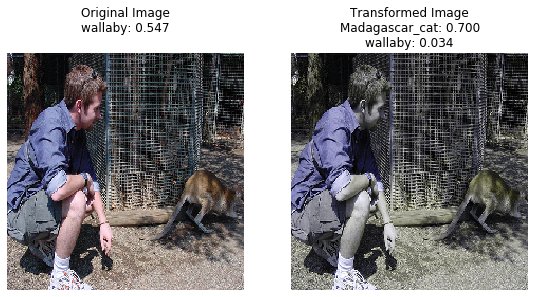

In [52]:
visualize_image(images, 134, ColorBlindnessFilter(), ['protanopia'],
                model, preprocess_input, decode_predictions)

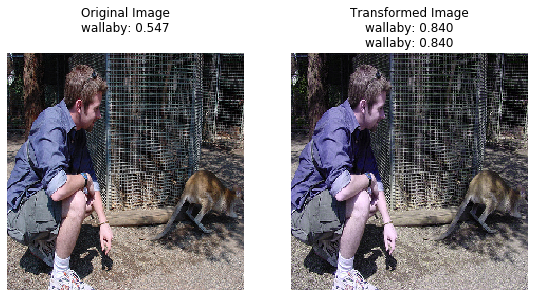

In [78]:
visualize_image(images, 134, DaltonizationLabEnchanceFilter(), ['protanopia'],
                model, preprocess_input, decode_predictions)

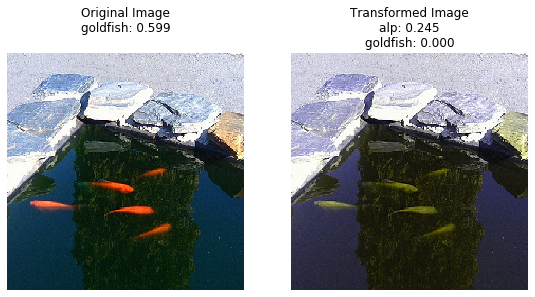

In [70]:
visualize_image(images, 16, ColorBlindnessFilter(), ['protanopia'],
                model, preprocess_input, decode_predictions)

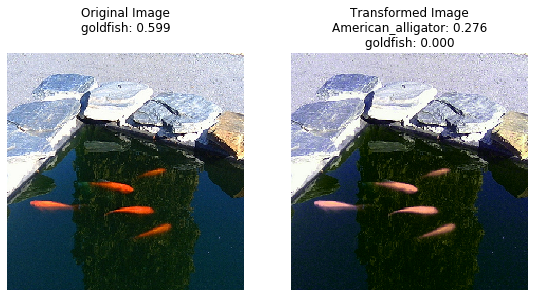

In [74]:
visualize_image(images, 16, DaltonizationLabEnchanceFilter(), ['protanopia'],
                model, preprocess_input, decode_predictions)

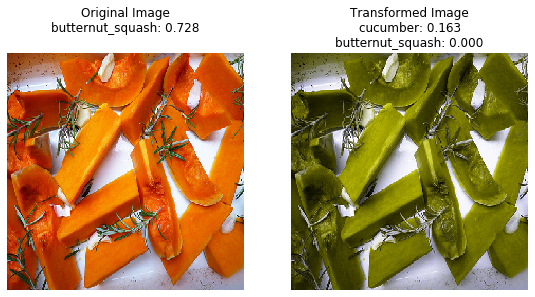

In [179]:
visualize_image(images, 790, ColorBlindnessFilter(), ['protanopia'],
                model, preprocess_input, decode_predictions)

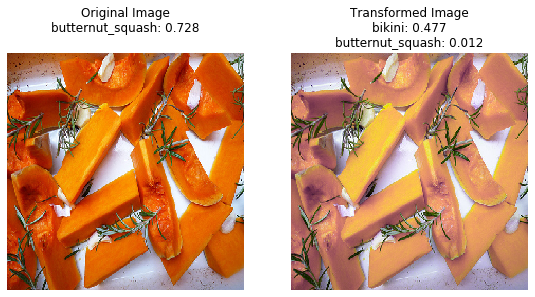

In [180]:
visualize_image(images, 790, DaltonizationLabEnchanceFilter(), ['protanopia'],
                model, preprocess_input, decode_predictions)